<a href="https://colab.research.google.com/github/MaharshSuryawala/Face-Detection-and-Facial-Expression-Recognition/blob/master/FaceDetectionAndExpressionRecognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [7]:
data = pd.read_pickle("final_data.pkl")

In [8]:
print(data.shape)

data = data[data['X'] != None]

print(data.shape)

(5149, 6)
(5149, 6)


In [9]:
data_nosketch = data[data['sketch'] == 0]
data_nosketch
data_nosketch.shape

(2561, 6)

In [10]:
def return_dataset(data, class_name):
    for index, row in data.iterrows():
        
        vec = data['X'][index]
        
      
        if index == 0:
            X = vec
            y = np.reshape(data[class_name][index], (1, 1))

        else:
            X = np.concatenate((X, vec), axis=1)
            y = np.concatenate((y, np.reshape(data[class_name][index], (1, 1))), axis=0)
            
    return X, y

In [11]:
X = data['X']
y = data['expression']


def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded
  
encoded_y = encode(y)
print(encoded_y)



#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.1, random_state = 42)
print(y_train.shape)
print(X_train.shape)


Shape of data (BEFORE encode): (5149,)
Shape of data (AFTER  encode): (5149, 7)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(4634, 7)
(4634,)


In [12]:
index = 0

X_list = list(X_train)
y_list = list(y_train)

X_list_n = []
X_test_n = []

for example in X_list:
  index = index + 1
  try:
    if (example.shape != (48, 48, 3)):
      print(index)
  except:
    print(X_list[index - 1])
    print(index - 1)
    X_list.pop(index - 1)
    y_list.pop(index - 1)
    
for example in X_list:
  gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
  X_list_n.append(gray)

  
  
for example in list(X_test):
  gray = cv2.cvtColor(example, cv2.COLOR_BGR2GRAY)
  X_test_n.append(gray)
    
    
print(len(X_list))
print(len(y_list))

X_t = np.stack(X_list_n, axis=0)
y_t = np.stack(y_list, axis=0)

X_tes = np.stack(list(X_test_n), axis=0)
y_tes = np.stack((y_test), axis=0)

X_t = np.reshape(X_t, (X_t.shape[0], X_t.shape[1], X_t.shape[2], 1))
X_tes = np.reshape(X_tes, (X_tes.shape[0], X_tes.shape[1], X_tes.shape[2], 1))

print(y_tes.shape)

None
681
4633
4633
(515, 7)


<class 'numpy.ndarray'> uint8 (303, 384)


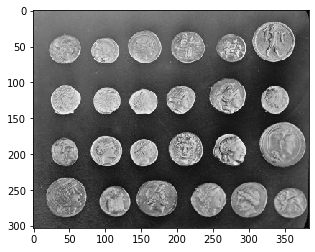

In [13]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

(515, 7)
(515, 48, 48, 1)
-----------
<class 'numpy.ndarray'>
uint8
(48, 48)
[1. 0. 0. 0. 0. 0. 0.]


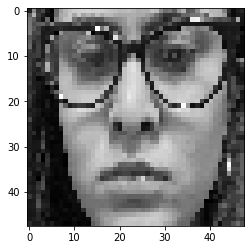

In [14]:
print(y_tes.shape)
print(X_tes.shape)

print("-----------")

print(type(X_tes[0]))
print(X_tes[0].dtype)
print(X_tes[0].reshape((X_tes[0].shape[0], X_tes[0].shape[1])).shape)

plt.imshow(X_t[32].reshape((X_tes[0].shape[0], X_tes[0].shape[1])), cmap='gray')
plt.show()

print(y_t[32])

In [16]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])

In [19]:
#train the model
history = model.fit(X_t, y_t,
              batch_size=64,
              epochs=30,
              verbose=1,
              validation_split=0.1111)

Epoch 1/30
65/65 [==============================] - 32s 488ms/step - loss: 0.2184 - categorical_accuracy: 0.6809 - val_loss: 0.2956 - val_categorical_accuracy: 0.5301

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []

predictions = model.predict(X_tes)

for i in predictions:
    pred_list.append(np.argmax(i))

for i in y_tes:
    actual_list.append(np.argmax(i))

confusion_matrix(actual_list, pred_list)

array([[49,  4,  3,  9,  1,  0,  4],
       [ 7, 30,  3, 24,  1,  2,  6],
       [13,  1, 42, 11,  5,  6,  5],
       [ 3,  0,  0, 69,  0,  1,  0],
       [10,  1,  1, 21, 24,  2,  9],
       [ 5,  5,  6, 19,  0, 51,  2],
       [12,  4,  4, 11,  2,  5, 22]])

In [21]:
predictions.shape

(515, 7)

In [22]:
np.sum(np.sum(confusion_matrix(actual_list, pred_list), axis=1), axis=0)

515

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


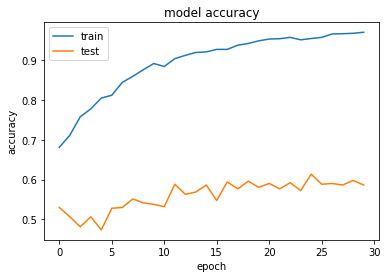

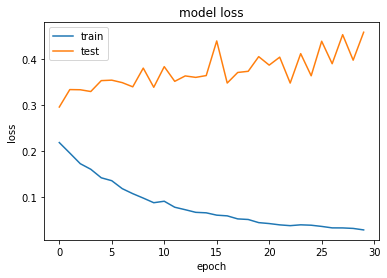

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()